# Nuke

Sometimes matplotlib just doesn't give us the tools we need to animate stuff. This block is a way to work around that.

Matplotlib.axes.Axes.quiver does not have a way to dynamically set the location of arrows, only the angle. In this example, we work around that.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

Lets first construct our data. 

In [2]:
E0 = np.array([1, 2])
E0 = E0 / np.linalg.norm(E0)

phi = np.array([0, np.pi/7])

f = 3
t = np.linspace(0,2*np.pi,100)

ES = E0[:, np.newaxis]*np.exp(1j*(t+phi[:, np.newaxis])) # fancy array boardcasting

Now, we animate the data.

<IPython.core.display.Javascript object>


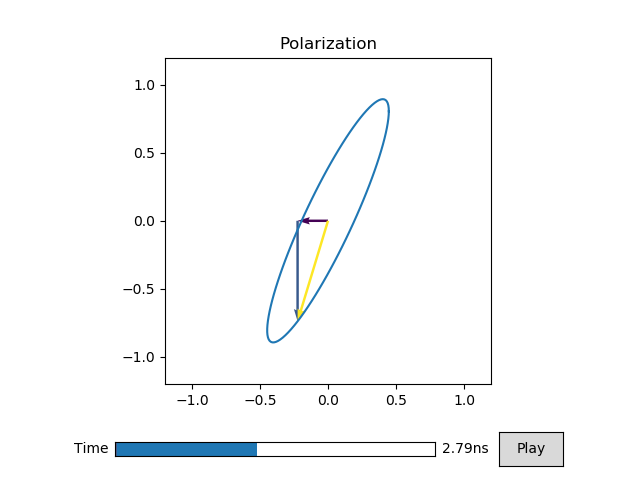

In [3]:
fig, ax = plt.subplots()

def animate(i):
    ax.set_title('Polarization')
    ax.set_aspect('equal')
    ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
    
    E = E0*np.exp(1j*(f*t[i]+phi))
    
    xx = np.array([0,E[0].real,0])
    yy = np.array([0,0,0])
    uu = np.array([E[0].real,0,E[0].real])
    vv = np.array([0,E[1].real,E[1].real])
    
    plax = ax.plot(ES[0].real, ES.real[1])
    qax = ax.quiver(xx,yy,uu,vv,[0,55,200], scale_units='xy', scale=1.)

animate(0) # initialise the plot with the animate function
    
timeline = amp.Timeline(t, units='ns', fps=10)
block = amp.blocks.Nuke(animate, length=len(timeline), ax=ax)
anim = amp.Animation([block], timeline)

anim.controls()
anim.save_gif('nuke')
plt.show()